# Sentiment analysis with Logistic Regression

### Some plotting functions

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/logistic_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 358, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 358 (delta 59), reused 3 (delta 1), pack-reused 252 (from 1)
Receiving objects: 100% (358/358), 42.64 MiB | 11.86 MiB/s, done.
Resolving deltas: 100% (182/182), done.
/content/machine_learning_1/logistic_regression


In [2]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

In [3]:
import numpy as np
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[3,2],[2,3]])
labels = np.array([0,0,0,0,1,1,1,1])

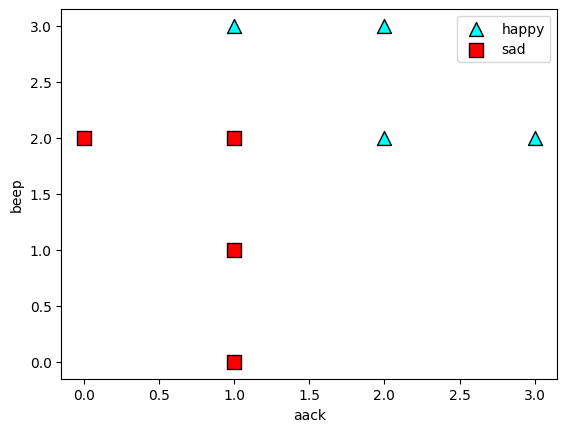

In [6]:
# Plotting the points
utils.plot_points(features, labels)

### Logistic regression

In [13]:
def sigmoid(x):
    ## TODO ##
    # implement sigmoid function
    output=1/(1+np.exp(-x))
    return output

def score(weights, bias, features):
    return np.dot(weights, features) + bias

def prediction(weights, bias, features):
    ## TODO ##
    # implement prediction calculation using sigmoid and score functions
    output=sigmoid(score(weights, bias, features))
    return output

def log_loss(weights, bias, features, label):
    ## TODO ##
    # implement log_loss calculation using prediction function
    y_prdict = prediction(weights, bias, features)
    output=-label* np.log(y_prdict)-(1-label)*np.log(1-y_prdict)
    return output

def total_log_loss(weights, bias, X, y):
    total_error = 0
    for i in range(len(X)):
        total_error += log_loss(weights, bias, X[i], y[i])
    return total_error

In [14]:
def logistic_trick(weights, bias, features, label, learning_rate = 0.01):
    ## TODO ##
    # update the weights and bias using a single data sample
    y_prdict = prediction(weights, bias, features)
    weights = weights + learning_rate * (label - y_prdict) * features
    bias = bias + learning_rate * (label - y_prdict)
    return weights, bias

In [17]:
def logistic_regression_algorithm(features, labels, learning_rate = 0.01, epochs = 1000):
    utils.plot_points(features, labels)
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        # Comment the following line of code to remove the plots of all the classifiers
        #utils.draw_line(weights[0], weights[1], bias, color='grey', linewidth=0.1, linestyle='dotted')
        errors.append(total_log_loss(weights, bias, features, labels))
        j = random.randint(0, len(features)-1)
        weights, bias = logistic_trick(weights, bias, features[j], labels[j])
    utils.draw_line(weights[0], weights[1], bias)
    plt.show()
    plt.scatter(range(epochs), errors)
    plt.xlabel('epochs')
    plt.ylabel('error')
    return weights, bias

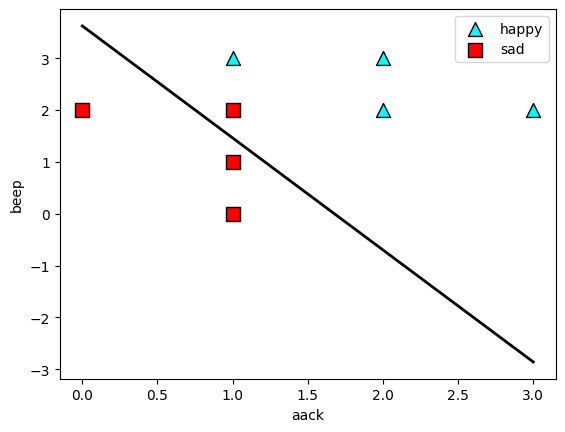

(array([0.89371606, 0.41345796]), -1.4983571041658406)

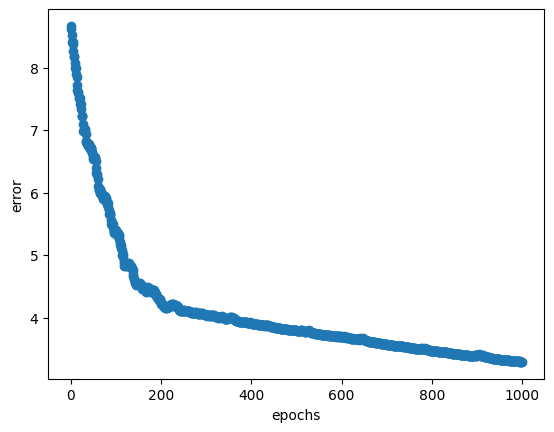

In [23]:
logistic_regression_algorithm(features, labels)

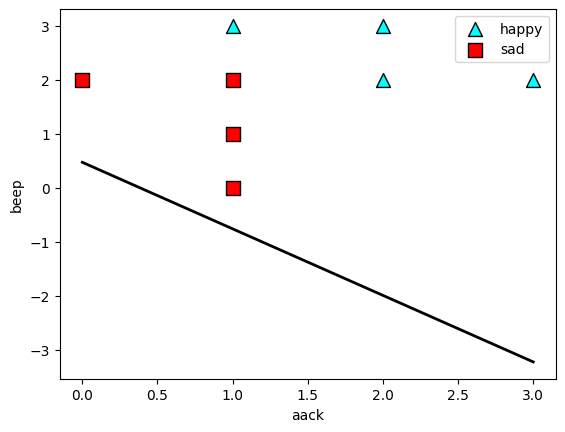

(array([0.77869825, 0.63164975]), -0.2990921732994381)

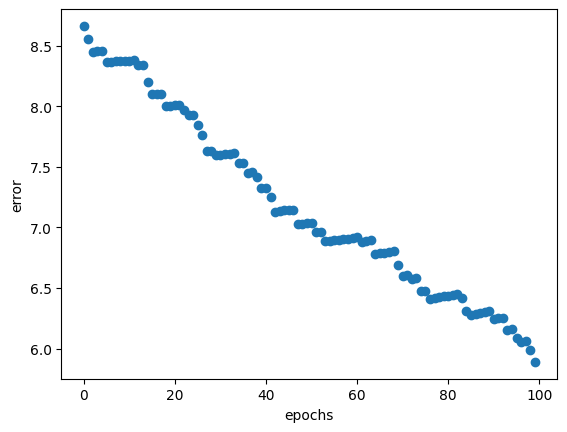

In [19]:
logistic_regression_algorithm(features, labels, learning_rate = 0.1, epochs = 100)

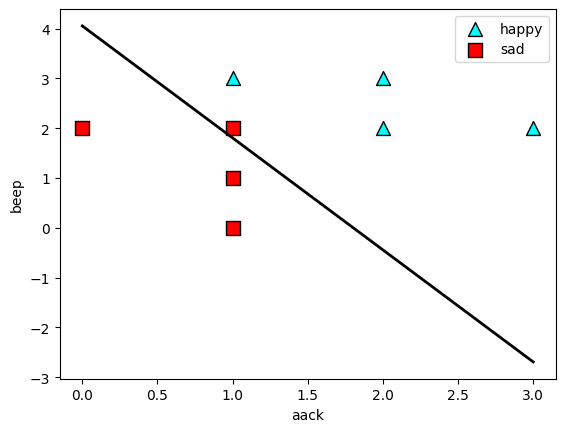

(array([0.83726679, 0.37221426]), -1.5095142748323327)

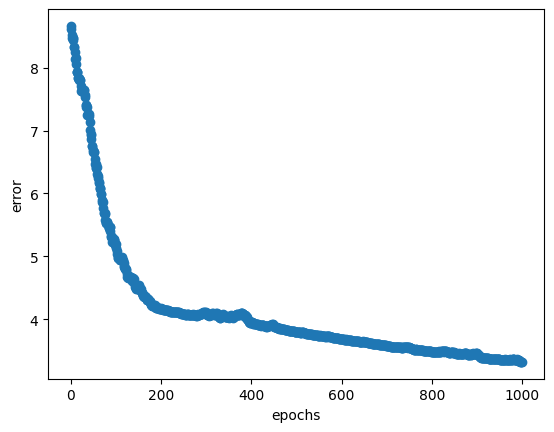

In [20]:
logistic_regression_algorithm(features, labels, learning_rate = 0.1, epochs = 1000)

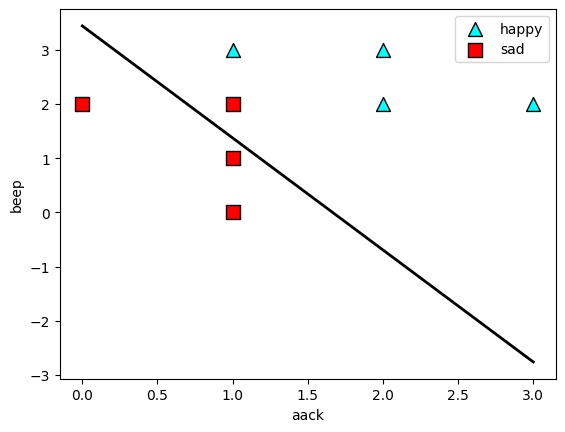

(array([0.92072163, 0.44579501]), -1.5328796543748233)

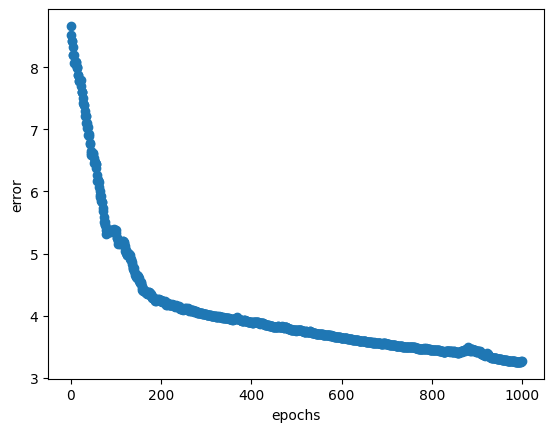

In [21]:
logistic_regression_algorithm(features, labels, learning_rate = 0.001, epochs = 1000)

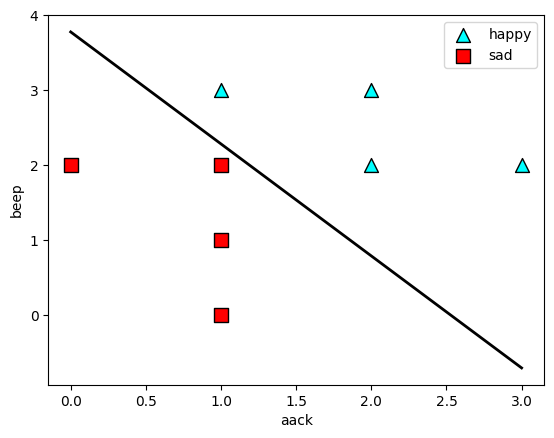

(array([2.23556391, 1.49585627]), -5.651856748082733)

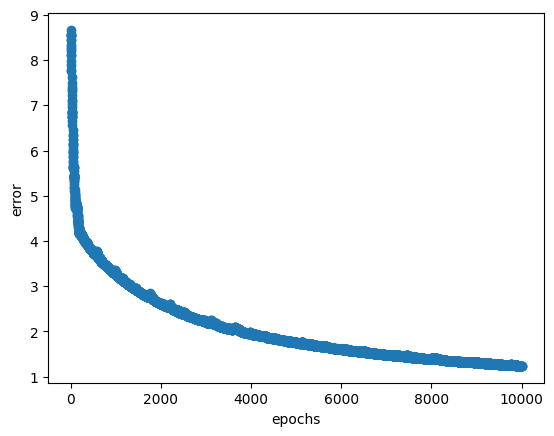

In [22]:
logistic_regression_algorithm(features, labels, learning_rate = 0.01, epochs = 10000)

# Logistic SKlearn

In [24]:
from sklearn.linear_model import SGDClassifier
## TODO ##
# use loss="log_loss",tol=None
clf=SGDClassifier(alpha= 0.001, tol= None, loss = "log_loss")
clf.fit(features, labels)

SGDClassifier(alpha=0.001, loss='log_loss', tol=None)

In [25]:
clf.score(features, labels)

1.0

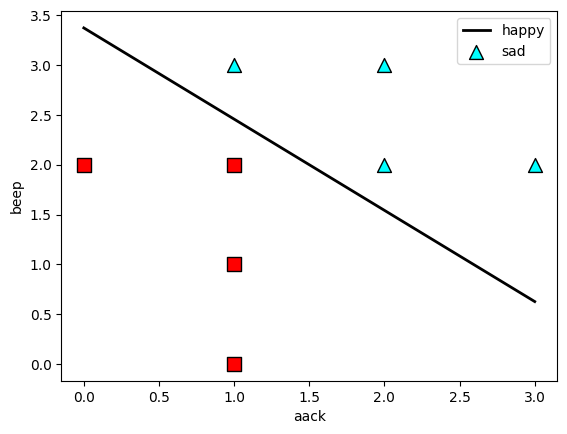

In [26]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()

### Real Example (Breast Cancer)

In [27]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [28]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import tempfile
import os

# Preset matplotlib figure sizes.
matplotlib.rcParams['figure.figsize'] = [9, 6]

In [29]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
            'concavity', 'concave_poinits', 'symmetry', 'fractal_dimension']
column_names = ['id', 'diagnosis']

for attr in ['mean', 'ste', 'largest']:
  for feature in features:
    column_names.append(feature + "_" + attr)

In [30]:
dataset = pd.read_csv(url, names=column_names)
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_poinits_mean,...,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave_poinits_largest,symmetry_largest,fractal_dimension_largest
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
train_dataset = dataset.sample(frac=0.75, random_state=1)
test_dataset = dataset.drop(train_dataset.index)
# The `id` column can be dropped since each row is unique
x_train, y_train = train_dataset.iloc[:, 2:], train_dataset.iloc[:, 1]
x_test, y_test = test_dataset.iloc[:, 2:], test_dataset.iloc[:, 1]

In [32]:
y_train, y_test = y_train.map({'B': 0, 'M': 1}), y_test.map({'B': 0, 'M': 1})

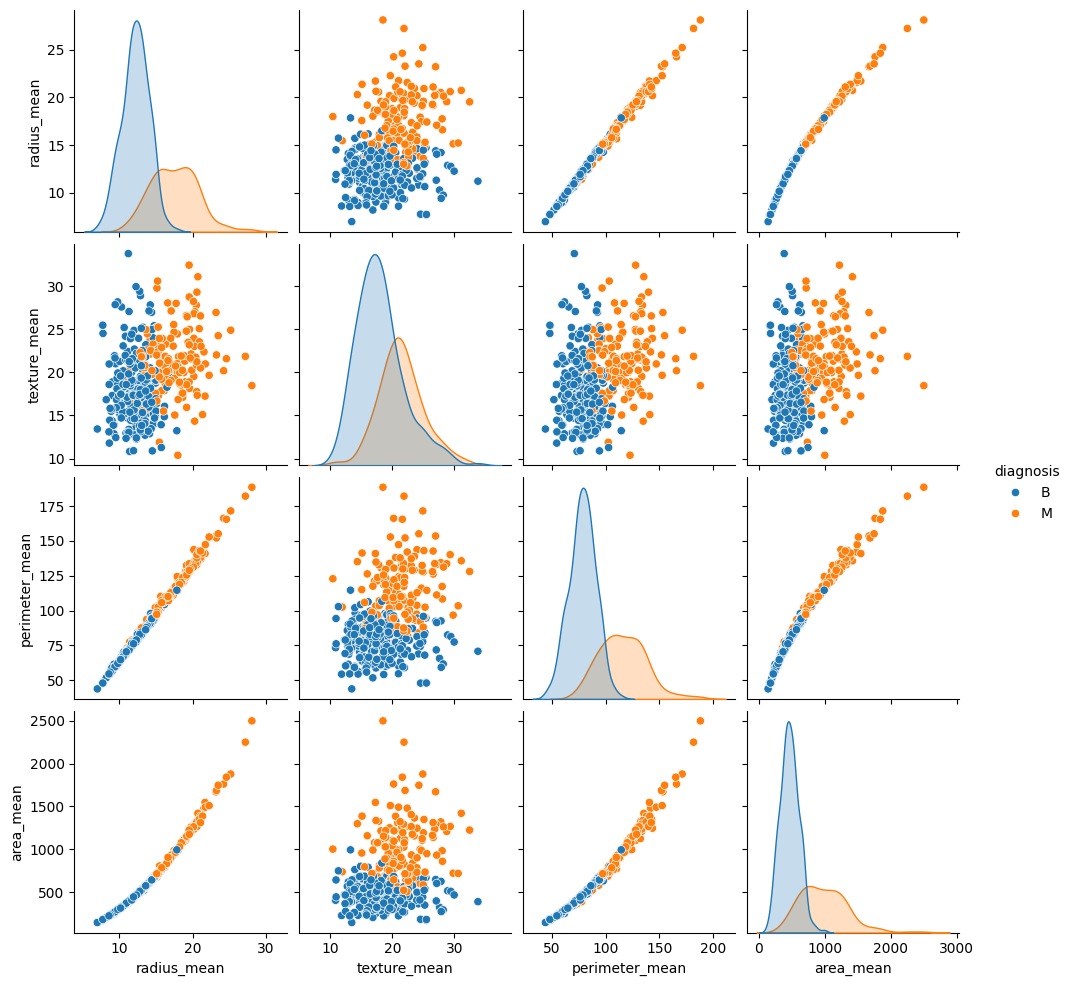

In [33]:
sns.pairplot(train_dataset.iloc[:, 1:6], hue = 'diagnosis');

In [38]:
# use only "radius_mean" feature
from sklearn.linear_model import SGDClassifier
clf=SGDClassifier(alpha= 0.001, tol= None, loss = "log_loss")
clf.fit(np.array(x_train["radius_mean"]).reshape(-1,1), y_train)


SGDClassifier(alpha=0.001, loss='log_loss', tol=None)

In [41]:
clf.score(np.array(x_train["radius_mean"]).reshape(-1,1), y_train)

0.8805620608899297

In [47]:
# use all data
from sklearn.linear_model import SGDClassifier
clf.fit(np.array(x_train), y_train)

SGDClassifier(alpha=0.001, loss='log_loss', tol=None)

In [49]:
clf.score(np.array(x_train), y_train)

0.9039812646370023

In [60]:
# use all data with standard scaler
# Fit the scaler on training data only
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x = st.fit_transform(x_train)
clf.fit(np.array(x), y_train)

SGDClassifier(alpha=0.001, loss='log_loss', tol=None)

In [61]:
clf.score(np.array(x), y_train)

0.9929742388758782